In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [2]:
import time

**Libarary**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

**Train-Test Set**

In [8]:
df_card = pd.read_csv( '/content/drive/MyDrive/학술제 폴더/카드사기 탐지/카드사기 데이터/creditcard.csv')
col_name = [ 'V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V9', 'V4', 'V7', 'V26', 
            'V18', 'V21', 'V1', 'V27', 'V15', 'V8', 'V20', 'V3', 'Class' ]
df_card = df_card[col_name]

In [9]:
X, y = df_card.iloc[:,:-1], df_card.iloc[:, -1]

In [10]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
492*100/(284315)

0.17304750013189596

In [12]:
validation_ratio_1 = [ 0.00216, 0.0029, 0.0044, 0.0087]
validation_ratio_2 = [0.0086, 0.017, 0.0865, 0.17]

1,2는 각각 undersampling의 비율과 oversampling의 비율
undersampling 은 다수 클래스에서 0.2 0.4 0.6 0.8만큼 재거한 비율
oversampling은 소수 클래스를 5, 10, 50, 100배 만큼 함

In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [13]:
classifier = [[LogisticRegression(), 'lreg'], [LinearSVC(C=0.001),'svc'], [RandomForestClassifier(max_depth=10),'rdf'], [KNeighborsClassifier(n_neighbors=3), 'knn']]

In [14]:
def Resampler(resampler, ratio):

  sampler = {
      'CC' : ClusterCentroids(sampling_strategy=ratio, random_state=0),
      'CNN': CondensedNearestNeighbour(random_state=0),
      'ENN': EditedNearestNeighbours(),
      'RENN': RepeatedEditedNearestNeighbours(),
      'AKNN': AllKNN(),
      'NCR': NeighbourhoodCleaningRule(),
      'RUS': RandomUnderSampler(sampling_strategy=ratio, random_state=0),
      'TL': TomekLinks,
      'ROS': RandomOverSampler(sampling_strategy=ratio, random_state=0),
      'SMOTE': SMOTE(random_state=0),
      'SVMSMOTE': SVMSMOTE(sampling_strategy=ratio, random_state=0),
  }
  
  return sampler[resampler]

원하는 Sampling을 선택하고 Resampler에 입력해서 돌린다

**UnderSampling**

In [ ]:
score = []
time_list = []
n_iter = 0
for train_index, test_index in skf.split(X, y):
    n_iter += 1
    start = time.time()
    CNN= CondensedNearestNeighbour(random_state=0)
    X_res, y_res = CNN.fit_resample(X.iloc[train_index], y.iloc[train_index])
    time_list.append(time.time() - start)

for clf in classifier:
      
    clf[0].fit(X_res, y_res)
    y_pred = clf[0].predict(X.iloc[test_index])
    score.append( [clf[1],0.00216, accuracy_score(y_pred,  y.iloc[test_index]), precision_score(y_pred, y.iloc[test_index]),
                       recall_score(y_pred, y.iloc[test_index]), f1_score(y_pred, y.iloc[test_index])] )      

In [ ]:
score

In [ ]:
time_list

**OverSampling**

**Evaluate**

In [ ]:
def score_evaluate(score):
  length = int(len(score))
  score = score.astype(np.float64)
  acc, pre, rec, f1s = [], [], [], []
  for i in range(0,length,5):
    acc.append(score[i:i+5,1].mean())
    pre.append(score[i:i+5,2].mean())
    rec.append(score[i:i+5,3].mean())
    f1s.append(score[i:i+5,4].mean())
  
  return acc, pre, rec, f1s

In [ ]:
score = np.array(score)

lreg_score_index = np.where(score == 'lreg')
svc_score_index = np.where(score == 'svc')
rdf_score_index = np.where(score == 'rdf')
knn_score_index = np.where(score == 'knn')
lreg_score = score[lreg_score_index[0]]
svc_score = score[svc_score_index[0]]
rdf_score = score[rdf_score_index[0]]
knn_score = score[knn_score_index[0]]
lreg_score = np.delete(lreg_score,0, axis=1)
svc_score = np.delete(svc_score,0, axis=1)
rdf_score = np.delete(rdf_score,0, axis=1)
knn_score = np.delete(knn_score,0, axis=1)

lreg_acc, lreg_pre, lreg_rec, lreg_f1s = score_evaluate(lreg_score)
svc_acc, svc_pre, svc_rec, svc_f1s = score_evaluate(svc_score)
rdf_acc, rdf_pre, rdf_rec, rdf_f1s = score_evaluate(rdf_score)
knn_acc, knn_pre, knn_rec, knn_f1s = score_evaluate(knn_score)

array안의 데이터를 이용해서 plot을 그린다

**Visualize**

Undersampler

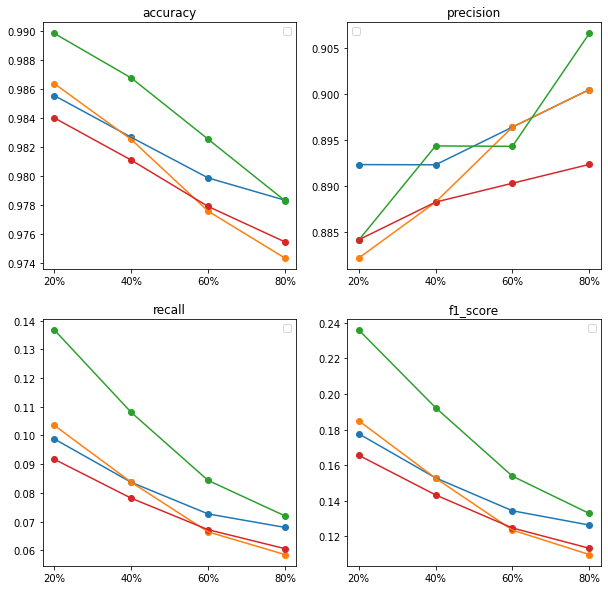

In [ ]:
acc = [lreg_acc, svc_acc, rdf_acc, knn_acc]
pre = [lreg_pre, svc_pre, rdf_pre, knn_pre]
rec = [lreg_rec, svc_rec, rdf_rec, knn_rec]
f1s = [lreg_f1s, svc_f1s, rdf_f1s, knn_f1s]
result = [acc, pre, rec, f1s]
result = np.array(result)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x_row1 = ['20%', '40%', '60%', '80%']
x_row2 = ['5', '10', '50', '100']
plt_name= ['accuracy', 'precision', 'recall', 'f1_score']

i = 0
for a in range(len(ax)): 
    for b in range(len(ax[a])):
        subplot_title = plt_name[i]
        ax[a,b].set_title(subplot_title)
        ax[a,b].legend(loc='best')
        ax[a,b].plot(x_row1, result[i][0])
        ax[a,b].plot(x_row1, result[i][1])
        ax[a,b].plot(x_row1, result[i][2])
        ax[a,b].plot(x_row1, result[i][3])
        ax[a,b].scatter(x_row1, result[i][0])
        ax[a,b].scatter(x_row1, result[i][1])
        ax[a,b].scatter(x_row1, result[i][2])
        ax[a,b].scatter(x_row1, result[i][3])
        i=i+1

plt.show()

OverSampler

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x_row1 = ['20%', '40%', '60%', '80%']
x_row2 = ['5', '10', '50', '100']
plt_name= ['accuracy', 'precision', 'recall', 'f1_score']

i = 0
for a in range(len(ax)): 
    for b in range(len(ax[a])):
        subplot_title = plt_name[i]
        ax[a,b].set_title(subplot_title)
        ax[a,b].legend(loc='best')
        ax[a,b].plot(x_row2, result[i][0])
        ax[a,b].plot(x_row2, result[i][1])
        ax[a,b].plot(x_row2, result[i][2])
        ax[a,b].plot(x_row2, result[i][3])
        ax[a,b].scatter(x_row2, result[i][0])
        ax[a,b].scatter(x_row2, result[i][1])
        ax[a,b].scatter(x_row2, result[i][2])
        ax[a,b].scatter(x_row2, result[i][3])
        i=i+1

plt.show()